In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = np.random

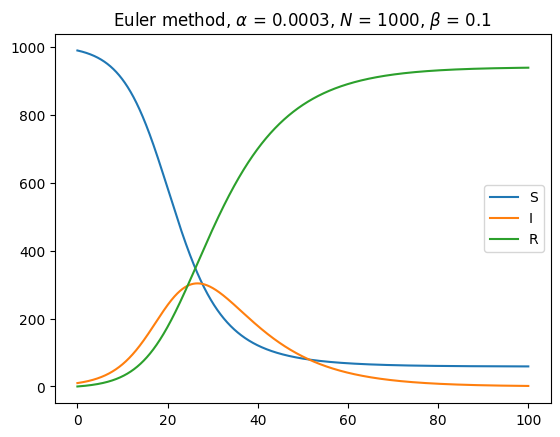

In [3]:
dt = 0.001
a = 0.0003
N = 1000
b = 0.1
def ds(S,I,a):
    return -a*S*I
def dI(S,I,a,b):
    return a*S*I - b*I
def dR(I,b):
    return b*I
t = 0
Tmax = 100
S = 990
I = 10
R = 0
Ss = []
Is = []
Rs = []
ts = []
while t < Tmax:
    Ss.append(S)
    Is.append(I)
    Rs.append(R)
    ts.append(t)
    S += dt*ds(S,I,a)
    I += dt*dI(S,I,a,b)
    R += dt*dR(I,b)
    t += dt
plt.plot(ts,Ss,label='S')
plt.plot(ts,Is,label='I')
plt.plot(ts,Rs,label='R')
plt.legend()
plt.title(f'Euler method, $\\alpha$ = {a}, $N$ = {N}, $\\beta$ = {b}')

plt.show()


Text(0.5, 1.0, 'Gillespie, $\\alpha$ = 0.0003, $N$ = 1000, $\\beta$ = 0.1')

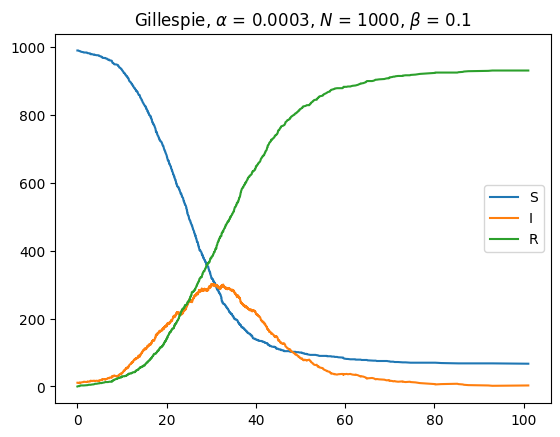

In [8]:
a = 0.0003
N = 1000
b = 0.1
c = 0
def SG(S,I,a):
    return a*S*I
def IG(I,b):
    return b*I
def RG(R,c):
    return c*R
t = 0

S = N-10
I = N-S
R = 0
SsG = []
IsG = []
RsG = []
tsG = []
happening = np.array([[-1,1,0],[0,-1,1],[1,0,-1]])
while t<100:#(I != 0 or S != 0):
    R1 = SG(S,I,a) # Rate of becoming infeceted/sick
    R2 = IG(I,b) # Rate of becoming recovered
    R3 = RG(R,c)
    RT = R1+R2+R3
    #print(S,I,R)
    if RT == 0:
        break
    dt = r.exponential(1/RT)
    t += dt
    tsG.append(t)
    U = r.uniform(0,RT)
    if U < R1:
        j = 0
    elif U < R1+R2:
        j = 1
    else:
        j = 2
    S, I, R = np.array([S, I, R]) + happening[j]
    SsG.append(S)
    IsG.append(I)
    RsG.append(R)
plt.plot(tsG,SsG,label='S')
plt.plot(tsG,IsG,label='I')
plt.plot(tsG,RsG,label='R')
plt.legend()
plt.title(f'Gillespie, $\\alpha$ = {a}, $N$ = {N}, $\\beta$ = {b}')
